# Learning from Data: Workshop 5

This workshop is not assessed per se, but it will form part of the next CA.

In [2]:
% pylab inline
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


## Decision boundaries and the Bayes error rate

The Bayes error rate is the minimum error rate that can be achieved with perfect knowledge of the probability distributions involved.  In this exercise we will assume that the *class conditional probability densities* are known and are one-dimensional Gaussian densities:
\begin{align*}
p(x | C_0) = \mathcal{N}(x; \mu_0, \sigma^2_0)\\
p(x | C_1) = \mathcal{N}(x; \mu_1, \sigma^2_1)
\end{align*}
For convenience, take $\mu_0 = 0$ and $\sigma^2_i = 1$ for $i = 0, 1$.  Remember that these are the probability that we observe a feature $x$, given that we know the class of the feature.

We will take the *prior probabilities* $p(C_0)$ and $p(C_1)$ to be $0.3$ and $0.7$ respectively.  These are the probabilities that an observation is in one class or the other before we have observed the actual data point.

### Data generation

We can generate some data from this model.  The procedure is:

    for each data point:
        draw the class, t, according to the prior probabilities
        draw the feature, x, from a Gaussian distribution with the mean and variance given by the class

Write a loop to generate vectors of pairs $x$ and $t$.  Draw lots of samples (say 10,000) and plot histograms (once for each class) of the samples (on the same plot) to make sure they correspond to your expectations.  For this exercise, take $\mu_1 = 3.5$ and with so many data points you'll be able to use plenty of bins (say 50 or 100); the second argument of <code>hist</code> controls the number of bins.

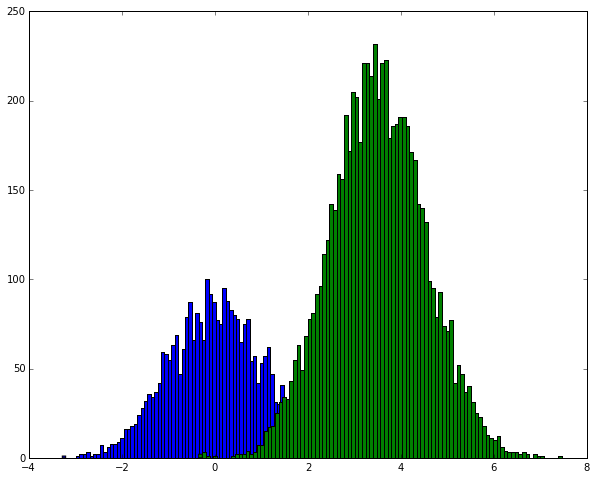

In [18]:
mu0 = 0.0
mu1 = 3.5
sigma = 1.0
p0 = 0.3
p1 = 1 - p0

t0 = 0
t1 = 1

# data for class C0
X0= randn(10000*p0)*sqrt(sigma)+mu0
t0 = repeat(t0, 10000*p0)
x0_t0 = np.hstack([np.matrix(X0).T, np.matrix(t0).T])

# data for class C1
X1= randn(10000*p1)*sqrt(sigma)+mu1
t1 = repeat(t1, 10000*p1)
x1_t1 = np.hstack([np.matrix(X1).T, np.matrix(t1).T])

hist(X0, bins=100)
hist(X1, bins=100)
print

Notice that the histograms you've plotted are proportional to $p(x | C_0) p(C_0)$ and $p(x | C_1) p(C_1)$.  Based on this, estimate by eye where the ideal decision boundary is.

In [14]:
# answered in workshop 7

### Empirical error rate

To start, let's see how the empirical error rate varies as the decision boundary is varied.  Call the location of the decision boundary $\lambda$.  Then if $x_n < \lambda$ then $x_n$ is classified to $C_0$; otherwise it is classified to $C_1$.  

Make a plot of the how the accuracy of this simple classifier varies as the decision boundary $\lambda$ is varied from -6 to +10.  From your plot what is the optimal location of the decision boundary?  Does it concur with your "by eye" estimate in the previous cell?  What is an *estimate* of the Bayes error rate?

Programming gotcha: beware that <code>lambda</code> is a Python keyword, so you can't use that name (spelled like that) as a variable.

In [16]:
lambd = linspace(-6, 10, 100)


### Theory

Now we will find the Bayes error rate using our knowlegde of the distributions from which the data was generated. 

Using the formula for $p(x|C_i) = \mathcal{N}(x; \mu_i, \sigma^2_i)$, draw on the same plot $p(x | C_0) p(C_0)$ and $p(x | C_1) p(C_1)$.  The point at which these curves cross is the location of the ideal decision boundary (why)?

If, as before, the decision boundary is at $x = \lambda$, then the errors that are made in the classification of points in $C_0$ is $\int_{\lambda}^\infty p(x | C_0) p(C_0) dx$.  Since we know that $p(x | C_0)$ is a Gaussian density this integral can we worked out in terms of the (complementary) error function. 

Recall that 
\begin{align}
\int_t^\infty \mathcal{N}(x; 0, 1) dx = \frac{1}{2}\mbox{erfc}(t)
\end{align}
where $\mbox{erfc}(t)$ is the complementary error function, which the next cell plots.

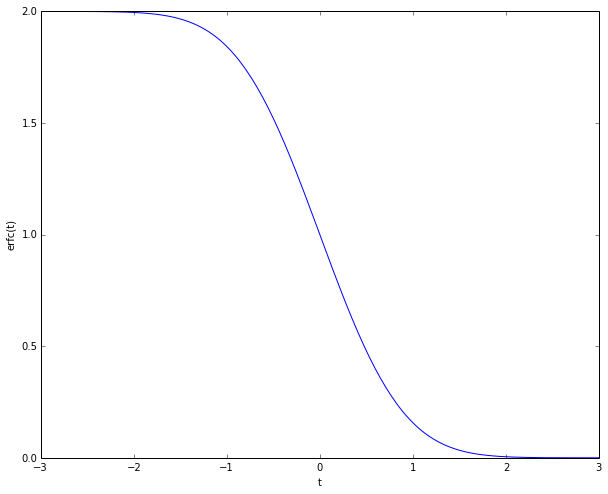

In [15]:
import scipy.special
t = linspace(-3, 3, 200)
plot(x, scipy.special.erfc(t))
xlabel('t')
ylabel('erfc(t)')

Use the complementary error function to draw a graph of the probability of making an error  in classifying  $C_0$ points as $\lambda$ is varied.  (Don't forget to account for the prior probability.)

Augment your graph with another curve, showing the probability of making an error in classifying $C_1$ points (you may find it easier to use the error function instead of the complementary error function).

Now plot the sum of these two curves, which is the total probability of making an error for any given $\lambda$.  Where is the best place for the decision boundary and what is the Bayes error rate?

### Posterior probabilities

Since we know the class conditional probabilities, we can use Bayes rule to work out the posterior probabilities exactly.  Use Bayes rule (see the lecture slides) to plot graphs of the posterior probabilities $p(C_i | x)$ for $ i = 0, 1$.  Check that these cross at the Bayes optimal decision boundary.  

### Rejection region

If you want to only classify examples that you are more than 80% confident of, where should the rejection lie?   In this case, what fraction of data is rejected?

### With less data

The answer you obtained above for the Bayes error and decision boundaries should concur with the answer you got empirically (make sure they do agree!).  However, the empirical estimate used a large number of data points and the data are one-dimensional.  Usually the data are high dimensional (so the decision boundary isn't a single $\lambda$) and we don't have that many data points, so empirically finding the Bayes error is infeasible. 

Suppose that instead of 10,000 data points you only have 20.  Use the first 20 of the 10,000 that you generated above.  

In this case trying to estimate $p(x | C_i)p(C_i)$ by histograms is going to be too crude even with one-dimensional features (you could try it as you did at the start above). 

An alternative approach is to assume (correctly in this case) that the data come from Gaussian's, but to estimate their mean and standard deviations from the data.  Using means and standard deviations calculated from the data, find the best decision boundary location and estimate the Bayes error rate.   

Since you used a single particular sample of 20 data points you might have got particularly lucky or unlucky.  Write a loop (and maybe a function!) to find the best decision boundary and error rate averaged over several 20-data-point samples.  How does the estimate vary as you increase the amount of data available?

### Receiver operating characteristics

In the "empirical error rate" cell above, you will have noticed that there is a trade-off between two sorts of errors: when $\lambda$ is negative, everything in $C_1$ is correctly classified, but at the expense of a poor classification rate for $C_0$.  The reverse is true when $\lambda$ is large and positive. 

A common way of viewing this trade-off is to focus on one of the classes, calling it the *positive class*.  Often we are more interested in one class than the other, for example, in spam classification we might designate emails that are spam as the positive class, in medical screening the condition that is being screened for is the positive class.  The types of classification that can be made are then:

* True positives: when $x$ is classified as positive and it is in fact positive;
* False positives: when $x$ is classified as positive, but is actually in the negative class.

Clearly, a good classifier will have a large true positive rate (the number of true positive classifications divided by the actual number of positive instances in the data) and a low false positive rate.

Make a plot of the true positive rate versus the false positive rate as $\lambda$ is varied from -6 to + 10.  Use the set of 10,000 examples to get a nice smooth curve. This curve, which displays the range of available true and false positive rates, is known as the receiver operating characteristic or ROC curve.  It allows the user to select a decision boundary (here $\lambda$) that takes into account the relative costs of misclassification.  In general, the better the classifier, the greater the area under the ROC curve.  More on this in the coming lectures.
